#E-Commerce Data Analysis

In the realm of e-commerce, data analysis is an integral process that involves the examination and interpretation of various datasets to derive valuable insights. The datasets typically comprise three key components: Customer Data, Order Data, and Reviews. Customer Data includes essential information such as customer ID and location, enabling businesses to understand the demographics and geographic distribution of their customer base. Order Data encompasses details like order names and category IDs, providing a comprehensive overview of the products or services that customers are purchasing. Lastly, the Review dataset incorporates crucial feedback in the form of review scores and comments, offering businesses the opportunity to gauge customer satisfaction and identify areas for improvement. Through the analysis of these datasets, e-commerce entities can optimize their strategies, personalize customer experiences, and enhance overall operational efficiency. The synergy of Customer Data, Order Data, and Reviews enables businesses to make informed decisions, fostering a data-driven approach to success in the dynamic world of e-commerce.

Data set : E-commerce-public-dataset (https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing)


#Business Question

Question 1 : What payment methods are most widely used in e-commerce?

Question 2 : In what month are purchase is the highest?


#Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df1=pd.read_csv("customers_dataset.csv")
df2=pd.read_csv("orders_dataset.csv")
df3=pd.read_csv("order_items_dataset.csv")
df4=pd.read_csv("order_payments_dataset.csv")
df5=pd.read_csv("order_reviews_dataset.csv")
df6=pd.read_csv("products_dataset.csv")
df7=pd.read_csv("product_category_name_translation.csv")
df8=pd.read_csv("sellers_dataset.csv")

In [63]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [64]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
df3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
df4.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
df5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
df6.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
df7.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
df8.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [65]:
product=df6.merge(df7,on="product_category_name", how="left")
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [66]:
df=df3.merge(df2,on="order_id", how="left")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [67]:
df=df.merge(df4,on="order_id", how="outer")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,fc20b8e282da6f3fbcdd3a3cedecb723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,10.0,3782.19
118430,92fca7ed7b7df4695007bd7f227e3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,52.57
118431,b17fd4c033b06e8d888de8ea6105ef9d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,103.10
118432,974f9f87a3bad01b2ac72fe987505e9b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,91.18


In [68]:
df=df.merge(df5,on="order_id", how="outer")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,fc20b8e282da6f3fbcdd3a3cedecb723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,10.0,3782.19,840989907fd522f373d46575d0f14b9b,1.0,NaN,"Fiz a compra, o PAGAMENTO FOI CONFIRMADO e apó...",2017-03-23 00:00:00,2017-03-23 14:24:44
119139,92fca7ed7b7df4695007bd7f227e3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,52.57,65fba10ef4086df6bc4d1630cb48adef,1.0,NaN,Produto não entregue = consumidor insatisfeito...,2017-03-05 00:00:00,2017-03-05 15:32:04
119140,b17fd4c033b06e8d888de8ea6105ef9d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,103.10,2a449a61e6b979ecfc88cf6dcb0c6d9a,1.0,NaN,NaN,2017-04-14 00:00:00,2017-04-14 12:34:15
119141,974f9f87a3bad01b2ac72fe987505e9b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,91.18,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df=df.merge(df1,on="customer_id", how="outer")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7353b0fb8e8d9675e3a704c60ca44ebe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21c933c8dd97d088e64c50988c90ccf5,5017.0,sao paulo,SP
119914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5effe9491d0f5a1c12ee4a384ec09bdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e9429d622d9e764ca60ba01bc252b0a8,8690.0,suzano,SP
119915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75c6e03e7206bd1dd59f427c9f75142a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ff36be26206fffe1eb37afd54c70e18b,13057.0,campinas,SP
119916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1761db2f0d235bbfa1c281093198af0c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21c2c79d24e2d8e3496aabb1f65d85c6,20270.0,rio de janeiro,RJ


In [70]:
df=df.merge(product,on="product_id", how="left")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7353b0fb8e8d9675e3a704c60ca44ebe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21c933c8dd97d088e64c50988c90ccf5,5017.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5effe9491d0f5a1c12ee4a384ec09bdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e9429d622d9e764ca60ba01bc252b0a8,8690.0,suzano,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119915,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119918 entries, 0 to 119917
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    119085 non-null  object 
 8   order_status                   118310 non-null  object 
 9   order_purchase_timestamp       118310 non-null  object 
 10  order_approved_at              118295 non-null  object 
 11  order_delivered_carrier_date   117056 non-null  object 
 12  order_delivered_customer_date 

In [72]:
df.isnull().sum()

order_id                            775
order_item_id                      1608
product_id                         1608
seller_id                          1608
shipping_limit_date                1608
price                              1608
freight_value                      1608
customer_id                         833
order_status                       1608
order_purchase_timestamp           1608
order_approved_at                  1623
order_delivered_carrier_date       2862
order_delivered_customer_date      4196
order_estimated_delivery_date      1608
payment_sequential                  778
payment_type                        778
payment_installments                778
payment_value                       778
review_id                          1772
review_score                       1772
review_comment_title             105929
review_comment_message            69673
review_creation_date               1772
review_answer_timestamp            1772
customer_unique_id                  833


In [73]:
df=df.dropna()
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_nam

In [75]:
df["order_purchase_date"]=pd.to_datetime(df["order_purchase_timestamp"])
df["order_purchase_date"]=df["order_purchase_date"].dt.strftime("%Y-%m-%d-%H")
df["order_purchase_date"]=pd.to_datetime(df["order_purchase_date"])
df["order_purchase_year"]=df["order_purchase_date"].dt.year
df["order_purchase_month"]=df["order_purchase_date"].dt.strftime("%B")
df["order_purchase_day"]=df["order_purchase_date"].dt.day
df["order_purchase_hour"]=df["order_purchase_date"].dt.hour

<ipython-input-75-a05119c88fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_purchase_date"]=pd.to_datetime(df["order_purchase_timestamp"])
<ipython-input-75-a05119c88fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_purchase_date"]=df["order_purchase_date"].dt.strftime("%Y-%m-%d-%H")
<ipython-input-75-a05119c88fd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [76]:
pd.set_option("display.max_column",None)
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_date,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
12,0006ec9db01a64e59a68b2c340bf65a7,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22 00:00:00,1.0,credit_card,4.0,97.32,6322c405c0f34bf3ad870fd1a6b1fced,5.0,Boa,Excelente serviço de compras on line.,2018-07-31 00:00:00,2018-08-01 23:05:10,7ed0ea20347f67fe61d1c99fdf8556ae,21810.0,rio de janeiro,RJ,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,bed_bath_table,2018-07-24 17:00:00,2018,July,24,17
17,000aed2e25dbad2f9ddb70584c5a2ded,1.0,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22 00:00:00,1.0,credit_card,1.0,152.77,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19 00:00:00,2018-05-22 10:52:24,6457be0b331148fb5454efc88d1e03d9,13458.0,santa barbara d'oeste,SP,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0,perfumery,2018-05-11 20:00:00,2018,May,11,20
28,00130c0eee84a3d909e75bc08c5c3ca1,1.0,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.9,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,2018-06-12 05:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20 00:00:00,1.0,boleto,1.0,35.84,4ff9a24999699f7104ed23fec2563351,5.0,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14 00:00:00,2018-06-14 19:50:09,b5910f24d2483d697b37e3857b621061,9820.0,sao bernardo do campo,SP,alimentos,59.0,982.0,1.0,150.0,17.0,13.0,13.0,food,2018-06-11 21:00:00,2018,June,11,21
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1.0,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,2018-05-19 10:59:50,2018-05-21 14:34:00,2018-06-04 18:08:23,2018-06-05 00:00:00,1.0,credit_card,2.0,51.10,048baba3f11436d12b06dab572aafc21,1.0,Pessima,O produto chegou e estragou sozinho,2018-06-05 00:00:00,2018-06-06 19:01:54,43860f86362fea12550bfa19ef73015f,38550.0,coromandel,MG,beleza_saude,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,health_beauty,2018-05-19 10:00:00,2018,May,19,10
57,002175704e8b209f61b9ad5cfd92b60e,1.0,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,2018-04-24 17:24:48,2018-04-23 19:03:19,2018-05-02 20:38:44,2018-05-14 00:00:00,1.0,credit_card,3.0,123.11,78412bf6c796b43df999fd87750d28ea,4.0,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03 00:00:00,2018-05-06 13:42:10,e7d41c19da317af0612170197303d5a9,14802.0,araraquara,SP,audio,38.0,2887.0,1.0,588.0,19.0,14.0,17.0,audio,2018-04-22 12:00:00,2018,April,22,12


In [77]:
df=df.drop(["order_purchase_timestamp", "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"],axis=1)

In [78]:
pd.set_option("display.max_column",None)
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,order_purchase_date,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
12,0006ec9db01a64e59a68b2c340bf65a7,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,1.0,credit_card,4.0,97.32,6322c405c0f34bf3ad870fd1a6b1fced,5.0,7ed0ea20347f67fe61d1c99fdf8556ae,21810.0,rio de janeiro,RJ,bed_bath_table,2018-07-24 17:00:00,2018,July,24,17
17,000aed2e25dbad2f9ddb70584c5a2ded,1.0,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,fff5169e583fd07fac9fec88962f189d,delivered,1.0,credit_card,1.0,152.77,00800678dcf28b0ea0caef2147b6945d,1.0,6457be0b331148fb5454efc88d1e03d9,13458.0,santa barbara d'oeste,SP,perfumery,2018-05-11 20:00:00,2018,May,11,20
28,00130c0eee84a3d909e75bc08c5c3ca1,1.0,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.9,7.94,47d656c08a282ec5ab4c1f18303a3a30,delivered,1.0,boleto,1.0,35.84,4ff9a24999699f7104ed23fec2563351,5.0,b5910f24d2483d697b37e3857b621061,9820.0,sao bernardo do campo,SP,food,2018-06-11 21:00:00,2018,June,11,21
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1.0,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,d1684ed69f8fd574b7c344de923f379a,delivered,1.0,credit_card,2.0,51.10,048baba3f11436d12b06dab572aafc21,1.0,43860f86362fea12550bfa19ef73015f,38550.0,coromandel,MG,health_beauty,2018-05-19 10:00:00,2018,May,19,10
57,002175704e8b209f61b9ad5cfd92b60e,1.0,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,a562db3c7cb9a68947debd30879b491e,delivered,1.0,credit_card,3.0,123.11,78412bf6c796b43df999fd87750d28ea,4.0,e7d41c19da317af0612170197303d5a9,14802.0,araraquara,SP,audio,2018-04-22 12:00:00,2018,April,22,12


##Question 1 : What payment methods are most widely used in e-commerce?

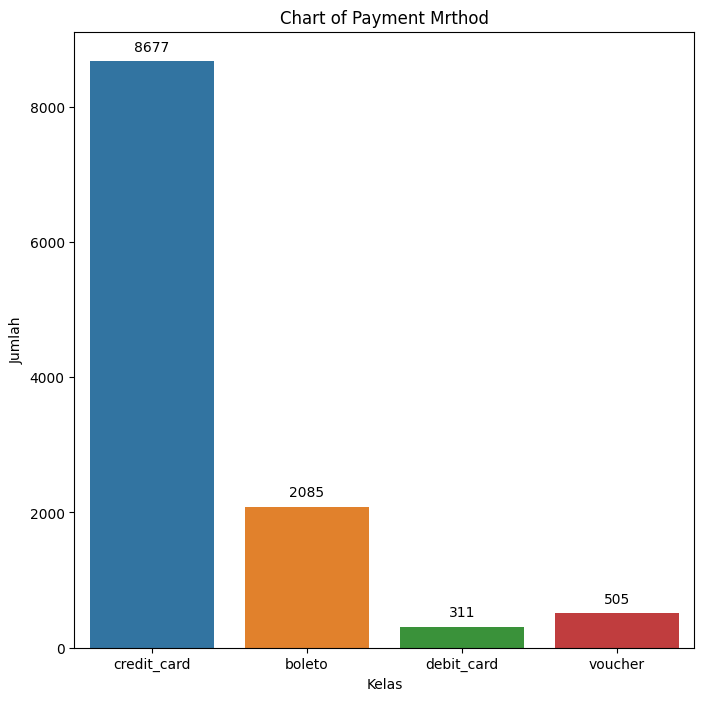

In [86]:
plt.figure(figsize=(8, 8))

pm = sns.countplot(data=df, x="payment_type")
plt.xlabel("Payment Method")
plt.ylabel("")
plt.title("Chart of Payment Method")

for p in pm.patches:
    pm.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

From the data we can know that most of the customer used credit_card as their payment method. This could be supported by the ease of access offered and established between e-commerce parties and credit card service providers. Apart from that, there is the possibility that there will be interesting promotions such as discounts or cashback provided by e-commerce for customers who use credit card payment methods.

##Question 2 : In what month are purchase is the highest?

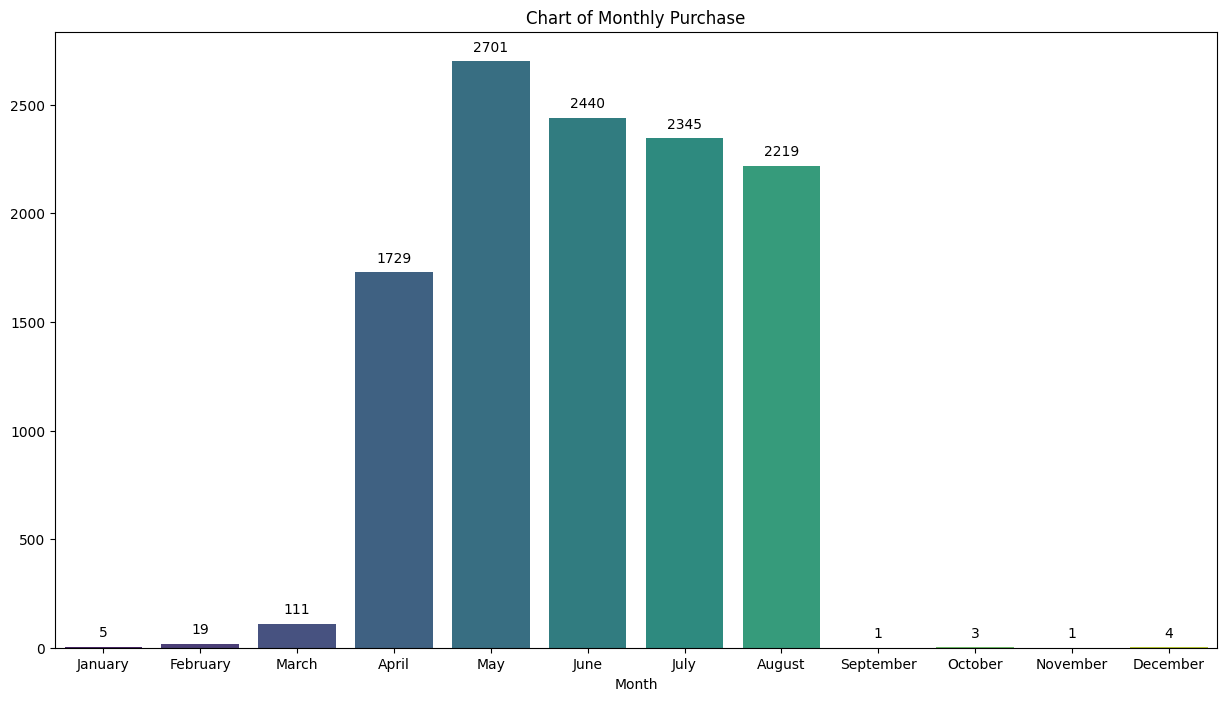

In [100]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(15, 8))  # Set the width to 15 inches and height to 5 inches

pm = sns.countplot(data=df, x="order_purchase_month", order=month_order, palette="viridis")

plt.xlabel("Month")
plt.ylabel("")
plt.title("Chart of Monthly Purchase")

for p in pm.patches:
    pm.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The highest sales are in May. It is possible that the month of May, which is summer, makes people more active and buy more things

#Summary

The conclusion from the e-commerce data above is that people make a lot of transactions in the summer, May and every transaction is paid using a credit card.